<a href="https://colab.research.google.com/github/Gyanendra079/Climate-Change-Modelling-/blob/main/Climate_Change_Modelling(NASA_facebook_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NASA Facebook Dataset Analysis**

<b>About Dataset</b>
<p>
<b>Overview</b><p>
This dataset encompasses over 500 user comments collected from high-performing
posts on NASA's Facebook page dedicated to climate change
(https://web.facebook.com/NASAClimateChange/). The comments, gathered from
various posts between 2020 and 2023, offer a diverse range of           <b>public opinions and sentiments about climate change</b> and NASA's related activities.</p>

Column Descriptors

1. Date: The date and time when the comment was posted.
2. LikesCount: The number of likes each comment received.
3. ProfileName: The anonymized name of the user who posted the comment.
4. CommentsCount: The number of responses each comment received.
5. Text: The actual text content of the comment.

###**Acknowledgements**

We extend our gratitude to NASA and their Facebook platform for facilitating open
discussions on climate change. Their commitment to fostering public engagement and
awareness on this critical global issue is deeply appreciated.

### **Ethical Considerations and Data Privacy**
All profile names in this dataset have been hashed using SHA-256 to ensure privacy
while maintaining data usability. This approach aligns with ethical data mining
practices, ensuring that individual privacy is respected without compromising the
dataset's analytical value.

Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [3]:
# read the facebook dataset
data = pd.read_csv('/content/Mydrive/MyDrive/Unified Mentor Project/Project 6/climate_nasa.csv')

In [4]:
# first five rows
data.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


# 1. **Data preprocessing**

In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')


# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **1.1 Clean text**
<p>Remove stopwords, punctuation, emojis etc.

In [6]:
def clean_text(text):
    if isinstance(text, str):
        # Remove emojis (a basic approach)
        text = text.encode('ascii', 'ignore').decode('ascii')
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Convert to lowercase
        text = text.lower()
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Tokenize and remove stopwords and stem
        tokens = text.split()
        cleaned_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
        return ' '.join(cleaned_tokens)
    else:
        return "" # Return empty string for non-string types

data['cleaned_text'] = data['text'].apply(clean_text)
display(data[['text', 'cleaned_text']].head())

,text,cleaned_text
0,Neat comparison I have not heard it before.\n ...,neat comparison heard would say co like disco ...
1,An excellent way to visualise the invisible! T...,excel way visualis invis thank
2,Does the CO2/ghg in the troposphere affect the...,coghg tropospher affect stratospher warmer tro...
3,excellent post! I defo feel the difference - o...,excel post defo feel differ one drink make fee...
4,"Yes, and carbon dioxide does not harm the Eart...",ye carbon dioxid harm earth like peopl make fa...


### **1.2 Feature Engineering** <p>Extract year, month, weekday from date column

In [7]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.dayofweek # Monday=0, Sunday=6
display(data[['date', 'year', 'month', 'weekday']].head())

,date,year,month,weekday
0,2022-09-07 17:12:32+00:00,2022,9,2
1,2022-09-08 14:51:13+00:00,2022,9,3
2,2022-09-07 17:19:41+00:00,2022,9,2
3,2022-09-08 00:51:30+00:00,2022,9,3
4,2022-09-07 19:06:20+00:00,2022,9,2


### **1.3 Data Normalization or Standardization** <p>For columns LikesCount and CommentsCount

In [8]:
# Fill NaN values with 0 for normalization
data['likesCount'] = data['likesCount'].fillna(0)
data['commentsCount'] = data['commentsCount'].fillna(0)

# Normalize using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['likesCount_normalized', 'commentsCount_normalized']] = scaler.fit_transform(data[['likesCount', 'commentsCount']])

display(data[['likesCount', 'commentsCount', 'likesCount_normalized', 'commentsCount_normalized']].head())

,likesCount,commentsCount,likesCount_normalized,commentsCount_normalized
0,2,0.0,0.015873,0.000000
1,0,0.0,0.000000,0.000000
2,1,3.0,0.007937,0.032258
3,4,0.0,0.031746,0.000000
4,16,26.0,0.126984,0.279570


# 2. **Exploratory Data Analysis**

## **2.1 Data Visualization**

#### 2.1.1 Plot the Visualization of the engagement trends over time.

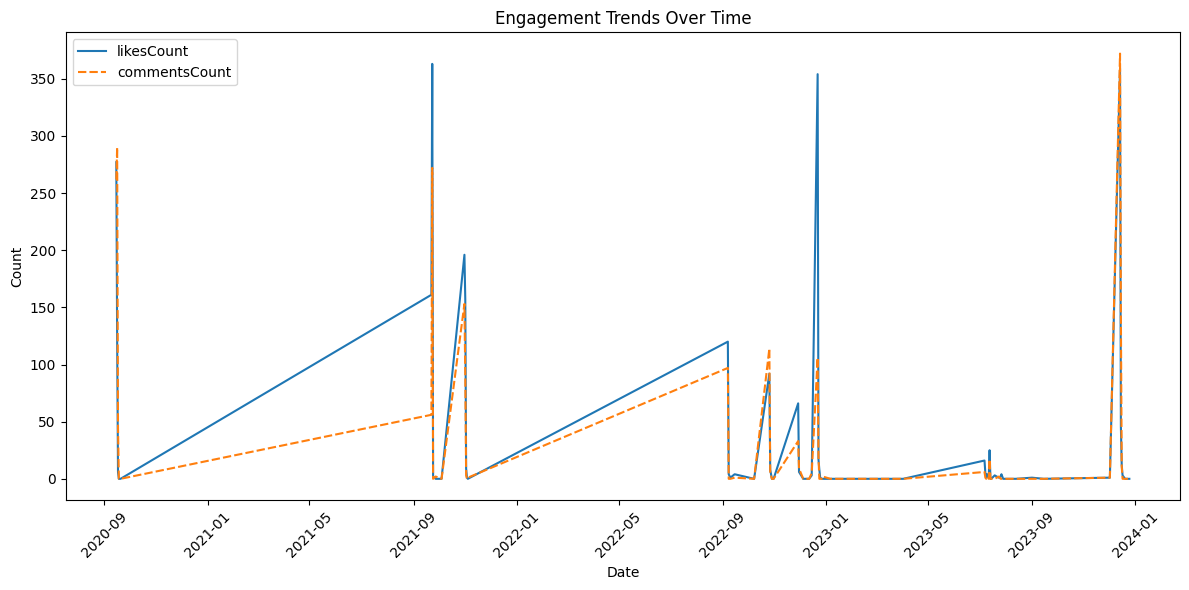

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date column and sum likes and comments
engagement_over_time = data.groupby(data['date'].dt.date)[['likesCount', 'commentsCount']].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=engagement_over_time)
plt.title('Engagement Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.1.2 Find the Top users with most comments(Use only first 5 letters of hashed ProfileName).

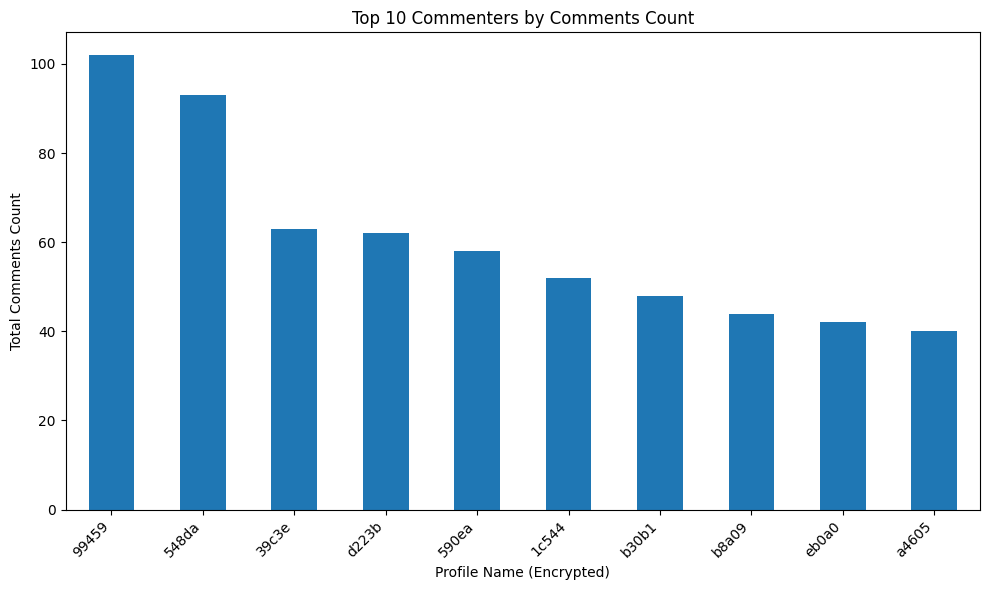

In [10]:
# Group by profile name and sum comments, then get top 10
top_commenters = data.groupby('profileName')['commentsCount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_commenters.index = top_commenters.index.str[:5]
top_commenters.plot(kind='bar')
plt.title('Top 10 Commenters by Comments Count')
plt.xlabel('Profile Name (Encrypted)')
plt.ylabel('Total Comments Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2>Word clouds and frequent terms</h2>

####2.1.3 Create a world cloud for the most common terms

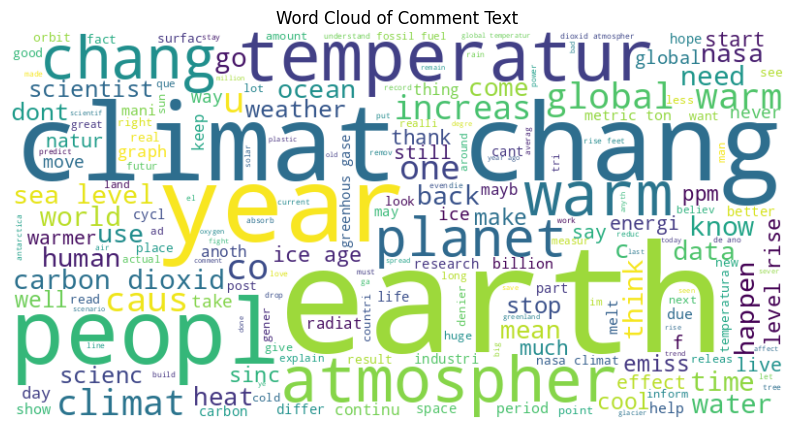

In [11]:
from wordcloud import WordCloud

# all cleaned text is added together
all_text = " ".join(data['cleaned_text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comment Text')
plt.show()



#### 2.1.4 Most frequent words used by the public during commenting/posting on climate change on Nasa Web page.

In [12]:
# Get most frequent terms
from collections import Counter

words = all_text.split()
most_common_words = Counter(words).most_common(20)

print("Most common words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common words:
climat: 127
chang: 116
year: 106
warm: 95
earth: 85
global: 76
atmospher: 62
temperatur: 62
peopl: 60
co: 58
carbon: 57
planet: 50
would: 47
water: 46
level: 46
rise: 45
nasa: 43
caus: 42
us: 42
ice: 41


# 3. **Sentiment Analysis**

### 3.1 Perform Sentiment Analysis using VADER

*Brief description about VADER*
<P>*Vader (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool that is specifically designed for analyzing social media texts. Vader is a pre-trained sentiment analysis model that provides a sentiment score for a given text.*</P>

In [13]:
# Install VADER
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [14]:
import nltk
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    if isinstance(text, str):
        sentiment_scores = analyzer.polarity_scores(text)
        # Classify as positive, negative, or neutral based on compound score
        if sentiment_scores['compound'] >= 0.05:
            return 'Positive'
        elif sentiment_scores['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral' # for non-string types text


data['vader_sentiment'] = data['text'].apply(get_sentiment_vader)

display(data[['text', 'vader_sentiment']].head())
display(data['vader_sentiment'].value_counts())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text,vader_sentiment
0,Neat comparison I have not heard it before.\n ...,Positive
1,An excellent way to visualise the invisible! T...,Positive
2,Does the CO2/ghg in the troposphere affect the...,Positive
3,excellent post! I defo feel the difference - o...,Positive
4,"Yes, and carbon dioxide does not harm the Eart...",Positive


,count
vader_sentiment,
Positive,202
Neutral,188
Negative,132


# 4. **Topic Modeling (Unsupervised Machine Learning)**

#### 4.1 Perform Topic Modeling using BERTopic

In [15]:
# Install BERTopic
!pip install bertopic umap-learn hdbscan sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.5 MB/s eta 0:00:00


In [16]:
# import necessary dependencies
from bertopic import BERTopic

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [17]:
# Initialize BERTopic model with calculate_probabilities=True
topic_model = BERTopic(verbose=True, embedding_model="paraphrase-MiniLM-L3-v2", calculate_probabilities=True)

# Fit the model on the cleaned text data and get probabilities
topics, probabilities = topic_model.fit_transform(data['cleaned_text'].dropna())

# Get the most frequent topics
display(topic_model.get_topic_info())

2025-09-26 11:18:53,618 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2025-09-26 11:19:10,532 - BERTopic - Embedding - Completed ✓
2025-09-26 11:19:10,542 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-26 11:19:29,211 - BERTopic - Dimensionality - Completed ✓
2025-09-26 11:19:29,213 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-26 11:19:29,251 - BERTopic - Cluster - Completed ✓
2025-09-26 11:19:29,256 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-26 11:19:29,285 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,468,0_climat_chang_year_warm,"[climat, chang, year, warm, earth, global, atm...",[know peopl say earth climat chang sinc long p...
1,1,54,1_bs_oh_thank_somethinglolol,"[bs, oh, thank, somethinglolol, emen, deed, or...","[bs, bs, oh well least c]"


#### 4.2 Visualize topics (Optional)


In [18]:
# requires ipywidgets
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.5 MB/s eta 0:00:00


In [19]:
# Visualize the distribution of the first document (index 0)
topic_model.visualize_distribution(probabilities[0])

In [20]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [21]:
topic_model.visualize_heatmap(top_n_topics=50)

In [22]:
topic_model.visualize_barchart(top_n_topics=8)

## Project Workflow

* Step 1: Data Preprocessing
  * Clean text (remove stopwords, punctuation, emojis).
  * Convert Date → extract year, month, weekday.
  * Normalize LikesCount, CommentsCount.
* Step 2: Exploratory Analysis
  * Plot engagement trends over time.
  * Top users (ProfileName with most comments).
  * Word clouds / frequent terms.
* Step 3: Sentiment Analysis
  * Use VADER for rule-based sentiment.
  * Or train a classifier (positive/negative).
* Step 4: Topic Modeling (Unsupervised)
  * BERTopic on Text column.
  * Visualize topics (Optional)


## Final Conclusion

Topic modeling is a technique used to discover abstract "topics" that occur in a collection of documents. In this case, the documents are the Facebook comments.

BERTopic works by:
1. **Embedding** the documents (comments) into a numerical representation.
2. **Reducing the dimensionality** of these embeddings.
3. **Clustering** the reduced embeddings to group similar comments together.
4. **Identifying topics** based on the most frequent words within each cluster.

The output seen from the `topic_model.get_topic_info()` shows:
* **Topic**: A unique identifier for each discovered topic (-1 usually represents noise or outliers).
* **Count**: The number of documents (comments) assigned to that topic.
* **Name**: A human-readable name for the topic, often represented by the most frequent words in the topic.
* **Representation**: A list of words that are most representative of the topic.
* **Representative_Docs**: Examples of documents that belong to this topic.

In output:
* **Topic 0** is the largest topic (470 comments) and seems to be about "climat chang year warm" (climate change, year, warming, etc.), which is expected given the dataset.
* **Topic 1** is a smaller topic (52 comments) with less clear words like "bs game emen deed". Looking at the representative documents, it seems to be related to non-relevant comments or possibly some kind of game or challenge mentioned in the comments.

In essence, topic modeling helps us understand the main themes or subjects being discussed within the comments without having to read through all of them manually.

## Insights and Next Steps

### Data Analysis Key Findings

* The trained sentiment classifier achieved an accuracy of approximately 63% on the test data. It performed reasonably well on Neutral and Positive sentiments but struggled with identifying Negative sentiment (recall of 0.19 for Negative).
* The analysis of topic evolution over time involved assigning dominant topics, preparing temporal data, aggregating and resampling topic counts weekly, and visualizing the evolution of the top 5 topics.
* The analysis of the relationship between topics and engagement showed that Topic 0 ('climat\_chang\_year\_warm') had significantly higher average engagement (5.19 likes and 4.48 comments) compared to Topic 1 ('bs\_game\_emen\_deed') (0.42 likes and 0.29 comments).

### Insights or Next Steps

* Improve the sentiment classifier's performance, particularly for the negative class, by exploring alternative models, features, or data augmentation techniques.
* Analyze the content and context of high-engagement topics (like Topic 0) to understand why they resonate more with the audience.